# Data Analysis for Customs and Border Protection Budget


- Data File Name: usbp_budget_1990_2018.csv

CSV file has:

    2 columns: 
        - Fiscal Year: Fiscal years(fiscal years run from October 1 of the budget's prior year through September 30 of the 
        year being described)        
        - Budget in Millions: Budget in millions of dollars, allocated for that fiscal year 

In [1]:
#load packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load .csv file 
bp_budget_df= pd.read_csv('../data/usbp_budget_1990_2018.csv')

In [3]:
#open df 
bp_budget_df

,fiscal_year,budget_in_millions
0,2018,4458
1,2017,4286
2,2016,3801
3,2015,3798
4,2014,3635
5,2013,3467
6,2012,3531
7,2011,3549
8,2010,2958
9,2009,2656


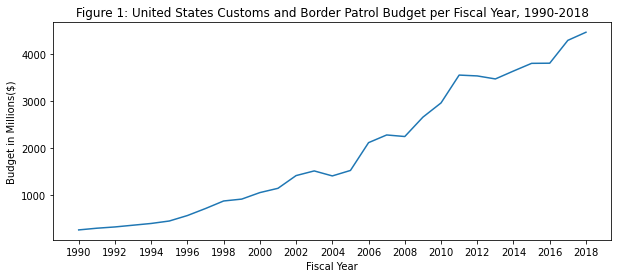

In [8]:
#creating a line graph to look at rise in budget over fiscal years 

plot=bp_budget_df.plot(x='fiscal_year', figsize=(10,4), legend=False, xlabel='Fiscal Year', ylabel='Budget in Millions($)', title='Figure 1: United States Customs and Border Patrol Budget per Fiscal Year, 1990-2018')
plt.locator_params(axis="x", nbins=28)

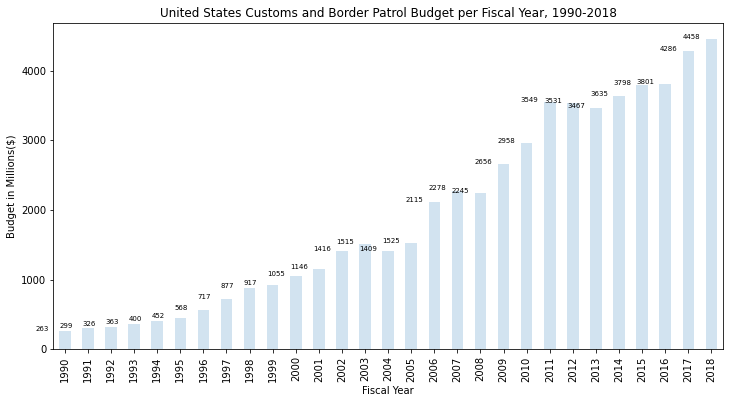

In [68]:
#creating a bar graph to look at rise in budget over fiscal years with y-values on bars 
ax=bp_budget_df.plot(kind='bar', x='fiscal_year', y='budget_in_millions', legend=False, alpha=0.2, figsize=(12,6))

plt.xlabel('Fiscal Year')
plt.ylabel('Budget in Millions($)')
plt.title('United States Customs and Border Patrol Budget per Fiscal Year, 1990-2018');

#putting labels signifying y values on top of each bar 


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+1.5, i.get_height()+2.7, \
            str(round((i.get_height()), 2)), fontsize=7, color='black')
    
#flipping the x-axis to be 1990-2018 instead of 2018-1990
ax.invert_xaxis()

### Clear that there is an increase in CBP budget from 1990 to 2018. Can this visualize the Prevention Through Deterrence Initiatives?

Prevention through Deterrance Operations: border security operations/initiatives/proposals that heavily enforced crossing points along the southern border in terms of funding, agents and other staff, and equipment (budget increases for CBP) 

Prevention through Deterrence Operations:
- Operation Blockade: El Paso and Ciudad Juarez Sept. 1993

- Operation Gatekeeper: Southern California 1994

- Operation Safeguard: Arizona 1994 1999 (tucson, yuma)

- Operation Rio Grande: South Texas 1997

Other Border Control Initiatives: 
- Secure Fence Act of 2006: authorized and partially funded the construction of 700 miles of fence/wall along the southern border (Signed October 2006)


* We can see the bump in funding in 1993 (\$400 to \$452 million) and 1994 (\$452 to \$568 million),  bump in funding in 1997 (\$877 to \$917 million), 1999 (\$1055 to \$1146 million), and decrease in funding in 2006 (\$2278 to \$2245 million) when the operations were approved and implemented. 

### Questions:
- maybe code the percentage increases in the budget from year to year? to prove that these operations brought more money into CBP than regular year-to-year growth 


In [69]:
bp_budget_df2=bp_budget_df.sort_values(by='fiscal_year', ascending=True)
bp_budget_df2

,fiscal_year,budget_in_millions
28,1990,263
27,1991,299
26,1992,326
25,1993,363
24,1994,400
23,1995,452
22,1996,568
21,1997,717
20,1998,877
19,1999,917


In [79]:
#looking at budget increase in $ (raw difference)
# each value will be calculate by subtracting the cases in the 
# current row from the number in the previous row
bp_budget_df2['budget_increase']=bp_budget_df2['budget_in_millions'].diff().fillna(0)

In [75]:
#looking at budget increase in $ (percentage before subtracting 1)
# each value will be calculate by dividing the cases in the 
# current row by the number in the previous row

bp_budget_df2['budget_increase2']=bp_budget_df2['budget_in_millions'].div(bp_budget_df2['budget_in_millions'].shift(1))


In [78]:
#looking at budget increase in $ (percentage increase in relation to budget from previous year)
bp_budget_df2['budget_increase_perc']=(bp_budget_df2['budget_increase2']*100)-100
bp_budget_df2

,fiscal_year,budget_in_millions,budget_increase2,budget_increase,budget_increase_perc
28,1990,263,NaN,0.0,NaN
27,1991,299,1.136882,36.0,13.688213
26,1992,326,1.090301,27.0,9.030100
25,1993,363,1.113497,37.0,11.349693
24,1994,400,1.101928,37.0,10.192837
23,1995,452,1.130000,52.0,13.000000
22,1996,568,1.256637,116.0,25.663717
21,1997,717,1.262324,149.0,26.232394
20,1998,877,1.223152,160.0,22.315202
19,1999,917,1.045610,40.0,4.561003


# Observations:  

* budget_increase_perc column: shows the growth in budget as a relation to budget from previous year 

# Interpretations: 

In FY 1993, the budget increased by 11.4% from $326 million to $363 million; in FY 1994, the budget increased by 10.2% from $400 million to 452 million; in FY 1997, the budget increased by 26.2% increasing from $568 million to $717 million; in FY 1999, the budget increased by 4.6%  increasing from $877 million to $917 million; in FY 2006, the budget increased by 38.6% from $1525 million to $2115; and FY 2017, the budget increased by 12.8% from $3801 million to $4286 million. The decrease in the federal budget between FY 2003 and FY 2004 can be attributed to the start of the Iraq war and the continuati9on of the Afghanistan war, where the national security budget was allocated abroad instead of domestically.

